In [1]:
import pandas as pd
import numpy as np
import random

# Define the number of rows for the DataFrame
num_rows = 100

# Generate random data for last names and first names
last_names = ['Gonzalez', 'Rodriguez', 'Fernandez', 'Lopez', 'Perez', 'Garcia', 'Sanchez', 'Martinez', 'Gomez', 'Diaz']
first_names = ['Maria', 'Jose', 'Juan', 'Ana', 'Luis', 'Laura', 'Pedro', 'Sofia', 'Carlos', 'Susana']
# Combine last names and first names to create full names
full_names = [f"{last_name}, {first_name}" for last_name in random.choices(last_names, k=num_rows) for first_name in random.choices(first_names, k=1)]

# Generate random DNI numbers
dni_numbers = np.random.randint(10000000, 99999999, size=num_rows)

# Define secondary school subjects
subjects = ['Matematica', 'Lengua', 'Historia', 'Geografia', 'Ciencias Naturales', 'Ingles', 'Educacion Fisica', 'Arte']

# Generate random grades and absences for each subject and trimester
grades_1st_trimester = np.random.randint(1, 11, size=(num_rows, len(subjects)))
grades_2nd_trimester = np.random.randint(1, 11, size=(num_rows, len(subjects)))
grades_3rd_trimester = np.random.randint(1, 11, size=(num_rows, len(subjects)))
absences = np.random.randint(0, 30, size=(num_rows, len(subjects)))

# Create a list to store data for each student
data = []
for i in range(num_rows):
    for subject_index, subject in enumerate(subjects):
        data.append([full_names[i], dni_numbers[i], subject,
                     grades_1st_trimester[i, subject_index],
                     grades_2nd_trimester[i, subject_index],
                     grades_3rd_trimester[i, subject_index],
                     absences[i, subject_index]])

# Create the DataFrame using pandas
df = pd.DataFrame(data, columns=['Apellido y Nombre', 'Nro_DNI', 'Materia Escolar',
                                 'Nota 1er Trimestre', 'Nota 2do Trimestre',
                                 'Nota 3er Trimestre', 'Faltas a Clases'])

# Display the first few rows of the DataFrame (to check)
df.head()

,Apellido y Nombre,Nro_DNI,Materia Escolar,Nota 1er Trimestre,Nota 2do Trimestre,Nota 3er Trimestre,Faltas a Clases
0,"Lopez, Juan",58889588,Matematica,8,8,6,6
1,"Lopez, Juan",58889588,Lengua,9,8,9,13
2,"Lopez, Juan",58889588,Historia,1,4,8,18
3,"Lopez, Juan",58889588,Geografia,10,2,7,18
4,"Lopez, Juan",58889588,Ciencias Naturales,9,5,4,8


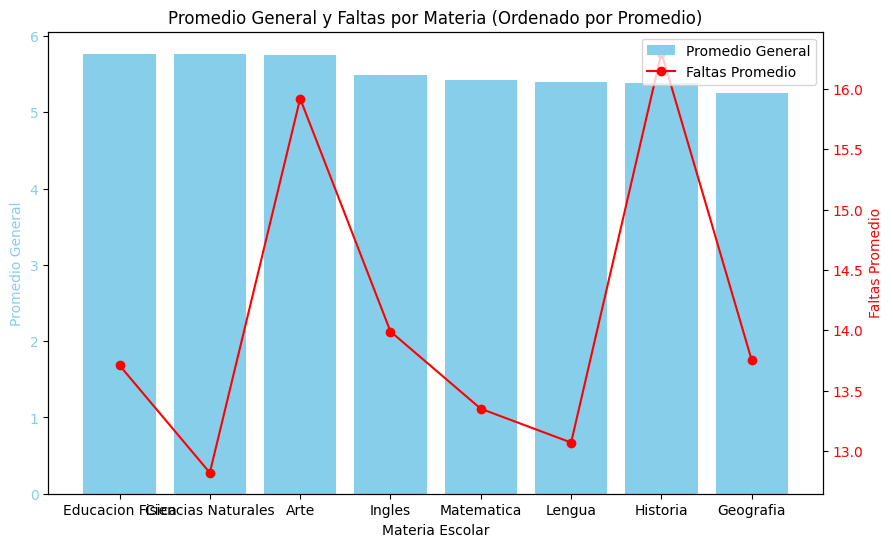

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate average grades for each subject
average_grades = df.groupby('Materia Escolar')[['Nota 1er Trimestre', 'Nota 2do Trimestre', 'Nota 3er Trimestre']].mean().mean(axis=1)

# Calculate average absences for each subject
average_absences = df.groupby('Materia Escolar')['Faltas a Clases'].mean()

# Sort subjects by average grade (descending order)
sorted_subjects = average_grades.sort_values(ascending=False).index

# Create the bar chart
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for average grades
ax1.bar(sorted_subjects, average_grades[sorted_subjects], color='skyblue', label='Promedio General')
ax1.set_xlabel('Materia Escolar')
ax1.set_ylabel('Promedio General', color='skyblue')
ax1.tick_params('y', labelcolor='skyblue')

# Secondary axis for average absences
ax2 = ax1.twinx()
ax2.plot(sorted_subjects, average_absences[sorted_subjects], color='red', marker='o', label='Faltas Promedio')
ax2.set_ylabel('Faltas Promedio', color='red')
ax2.tick_params('y', labelcolor='red')

# Add title and legend
plt.title('Promedio General y Faltas por Materia (Ordenado por Promedio)')
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the chart
plt.show()